In [3]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()

### with the help of get we are going to retrieve the value associated, if empty list [] is present it will not give typerror
pokedex = data.get('pokemon',[])
df = pd.DataFrame(pokedex)

output_path = 'pokedex.xlsx'
df.to_excel(output_path,index=False)

In [4]:
df = pd.read_excel('pokedex.xlsx')
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


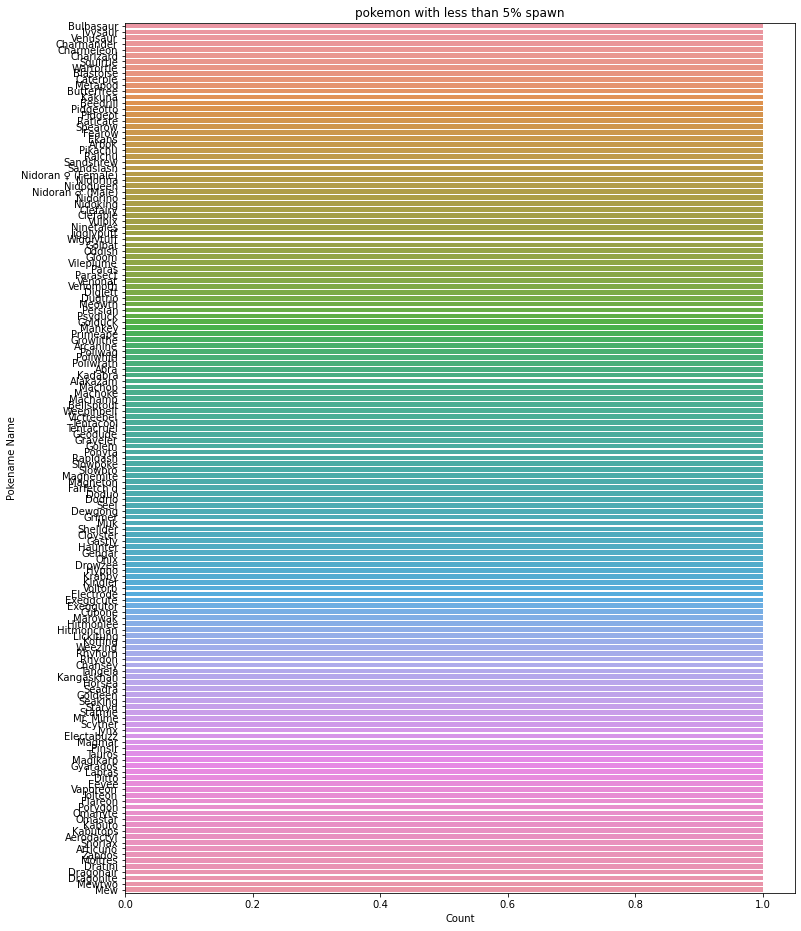

In [12]:
### importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
filtered_df = df[df["spawn_chance"]< 5]

#plotting the analysis
plt.figure(figsize=(12,16))
sns.countplot(data=filtered_df,y='name')
plt.xlabel("Count")
plt.ylabel("Pokename Name")
plt.title("pokemon with less than 5% spawn")
plt.show()


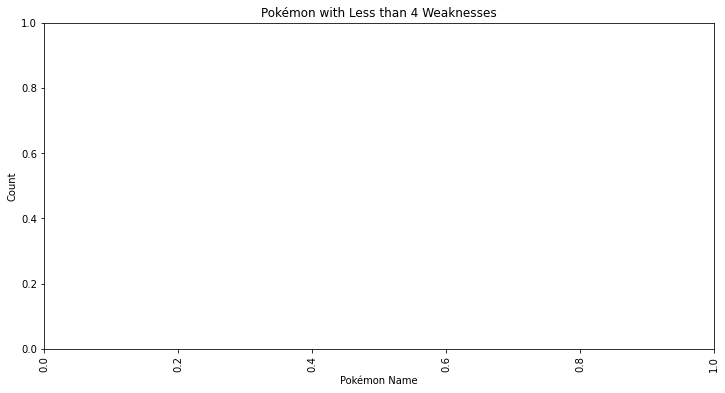

In [22]:
filtered_df = df[df["weaknesses"].apply(lambda x: len(x)) < 4]

# Plotting the analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x="name", bins=len(filtered_df))
plt.xticks(rotation=90)
plt.xlabel("Pokémon Name")
plt.ylabel("Count")
plt.title("Pokémon with Less than 4 Weaknesses")
plt.show()

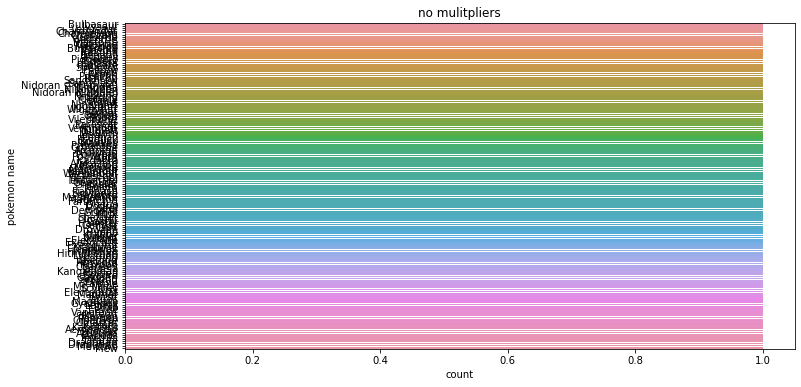

In [33]:
import numpy as np
## isinstance() let us in list 
filtered_df = df[df['multipliers'].apply(lambda x:len(x) if isinstance(x, list) else np.nan)!= 1]

## plot the analysis
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df,y='name')
plt.xlabel('count')
plt.ylabel('pokemon name')
plt.title('no mulitpliers')
plt.show()

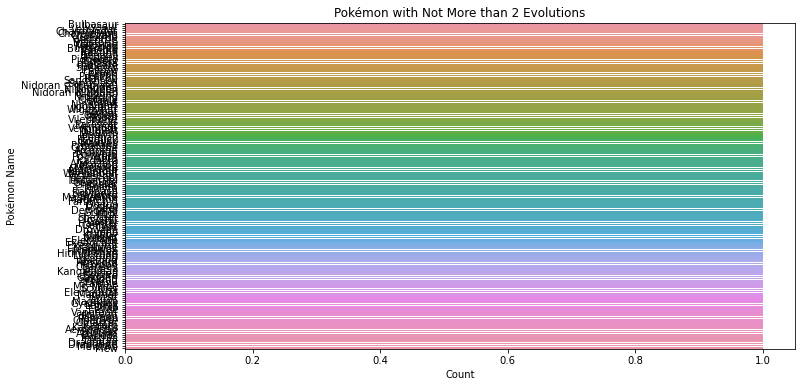

In [34]:
# Filter Pokémon with not more than 2 evolutions
filtered_df = df[df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0) <= 2]

# Plotting the analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="name")
plt.xlabel("Count")
plt.ylabel("Pokémon Name")
plt.title("Pokémon with Not More than 2 Evolutions")
plt.show()

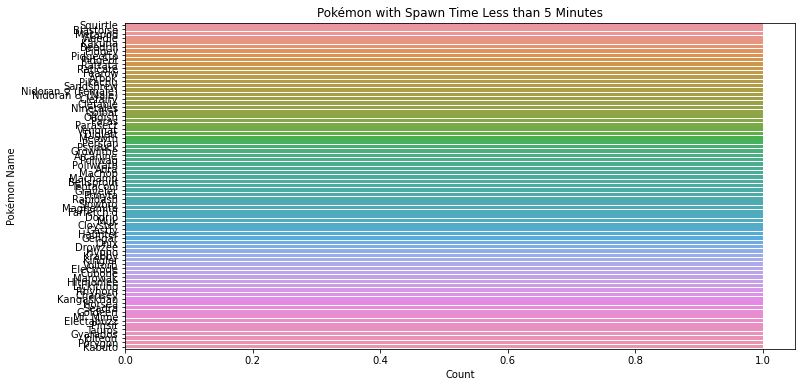

In [37]:
# Convert spawn time to seconds
# Convert spawn time to seconds
df["spawn_time_seconds"] = df["spawn_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]) if isinstance(x, str) else float("inf"))

# Filter Pokémon with spawn time less than 300 seconds (5 minutes)
filtered_df = df[df["spawn_time_seconds"] < 300]

# Plotting the analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="name")
plt.xlabel("Count")
plt.ylabel("Pokémon Name")
plt.title("Pokémon with Spawn Time Less than 5 Minutes")
plt.show()

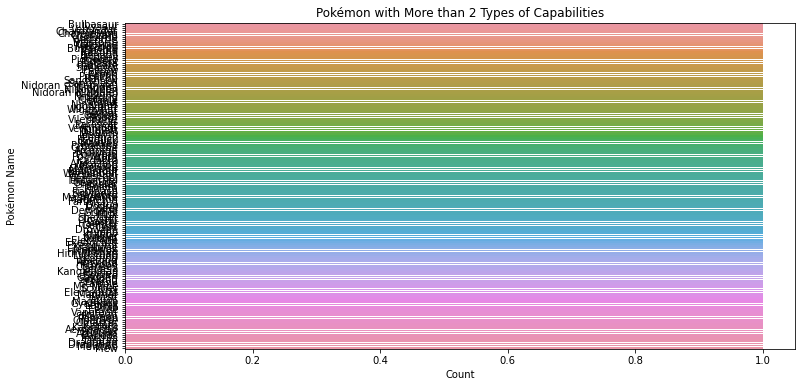

In [38]:
# Count the number of capabilities (types) for each Pokémon
df["num_capabilities"] = df["type"].apply(lambda x: len(x))

# Filter Pokémon with more than 2 types of capabilities
filtered_df = df[df["num_capabilities"] > 2]

# Plotting the analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="name")
plt.xlabel("Count")
plt.ylabel("Pokémon Name")
plt.title("Pokémon with More than 2 Types of Capabilities")
plt.show()